In [34]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import matplotlib.patheffects as PathEffects

sns.set_style("whitegrid")

In [40]:
# load in identification.xlsx with pandas
df = pd.read_excel('identification.xlsx')

# in fill all NaNs with forward fill
df = df.fillna(method='ffill')

# replace distance with base + distance
df['distance'] = df['Base Distance'] + df['Distance']
0.6
# remove base distance
df = df.drop('Base Distance', axis=1)

# remove all unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# make transect integer
df['transect'] = df['transect'].astype(int)

# remove rows with type "Vase"
df = df[df['Type'] != 'Vase']

df = df.drop('Quadrant', axis=1)

df.head()

,zone,transect,Distance,Species,Class,Type,Key,distance
0,High coral zone,0,0.0,Acropora,C,Branching,C - coral,0.0
1,High coral zone,0,0.0,Platygyra,C,Meandering,N - Anenome,0.0
2,High coral zone,0,0.0,Porite,C,Massive,F - Fish,0.0
3,High coral zone,0,0.0,Favia,C,Massive,S - Starfish,0.0
5,High coral zone,0,0.0,Pocillopora,C,Branching,A - Algae,0.0


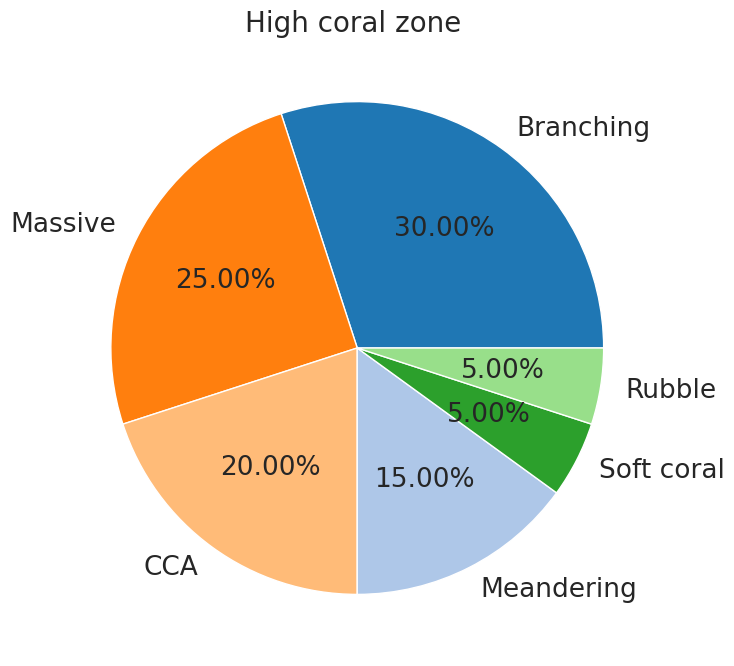

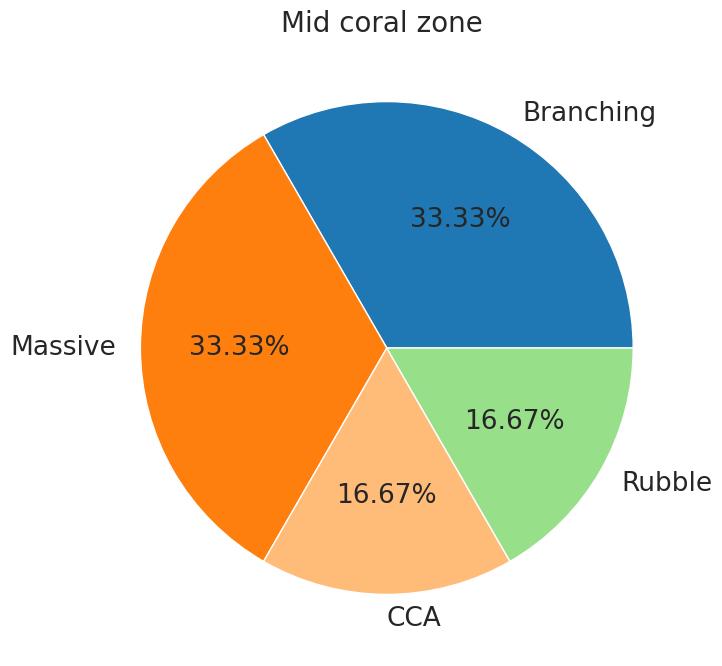

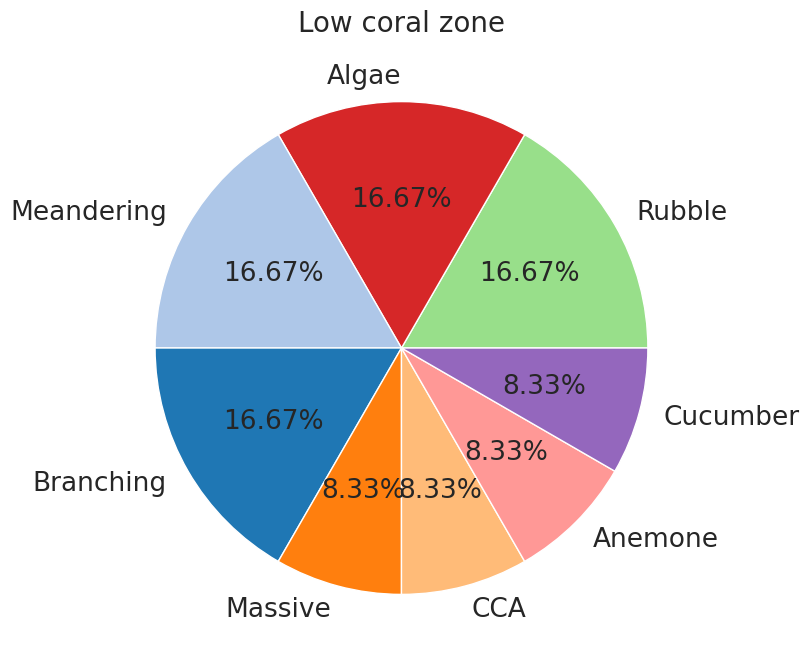

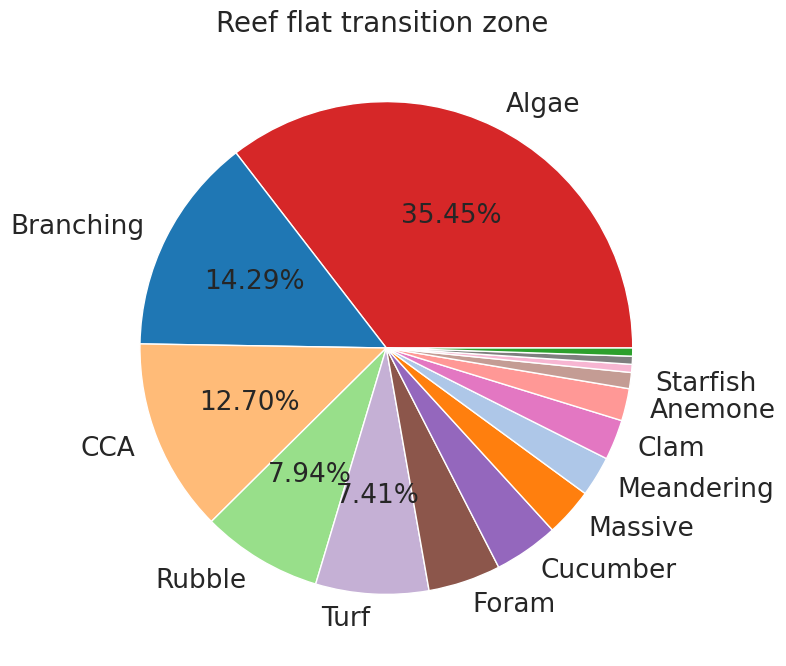

In [41]:
colour_map = {}
contrasting_colour_array = plt.cm.tab20.colors

for coral_type, count in zip(df['Type'].unique(), range(len(df['Type'].unique()))):
    colour_map[coral_type] = contrasting_colour_array[count]

# generate pie charts of type breakdown for each "zone" with percentages
for zone in df['zone'].unique():
    labels = list(df[df['zone'] == zone]['Type'].value_counts().index)
    
    if len(labels) > 12:
        for i in range(12, len(labels)):
            labels[i] = ''
            
    # consistent figure size
    plt.figure(figsize=(8, 8))
    plt.tight_layout()
    plt.title(zone, fontsize=20)
    plt.pie(df[df['zone'] == zone]['Type'].value_counts(),
            labels=labels,
            autopct=lambda p: "{:.2f}%".format(p) if p > 5 else None,
            colors=[colour_map[coral_type] for coral_type in df[df['zone'] == zone]['Type'].value_counts().index],
            textprops={'fontsize': 19},
            labeldistance=1.1)
    
    #
    plt.savefig('output/map/{}_pie_chart.png'.format(zone.replace(" ", "_")), dpi=300, bbox_inches='tight')

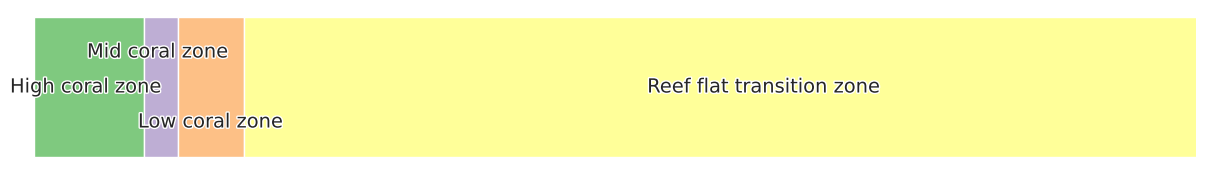

In [42]:
# colour map for reef zones
colour_map_zones = {}
contrasting_colours_zones = plt.cm.Accent.colors
for coral_type, count in zip(df['zone'].unique(), range(len(df['zone'].unique()))):
    colour_map_zones[coral_type] = contrasting_colours_zones[count]


#sideways stacked bar plot showing the different zones
plt.figure(figsize=(15,2))
last = 0
for i, zone in enumerate(df['zone'].unique()):
    zone_length = df[df['zone'] == zone]['Type'].value_counts().sum()
    plt.barh("Loc", zone_length, color=colour_map_zones[zone], left=last)
    txt = plt.text(last + zone_length/2, 0 - 0.2 + ((i+1) % 3) * 0.2, zone, ha='center', va='center', fontsize=14)
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    last=last + zone_length

plt.xlim(0, 210)

plt.yticks([])
plt.xticks([])
plt.grid(False)

plt.gca().axis('off')

plt.savefig('output/map/zone_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()



In [43]:
# create dataframe of type quanitty for each distance
coral_types = df['Type'].unique()
columns= ['distance']  + coral_types.tolist()
distance__and_quantity_df = pd.DataFrame(columns=columns)

for distance in df['distance'].unique():
    row = {'distance': distance}
    for coral_type in coral_types:
        row[coral_type] = len(df[(df['distance'] == distance) & (df['Type'] == coral_type)])
    distance__and_quantity_df = pd.concat([distance__and_quantity_df, pd.DataFrame([row])], ignore_index=True)

# distance as integer
distance__and_quantity_df['distance'] = distance__and_quantity_df['distance'].astype(int)

/tmp/ipykernel_44560/1416862956.py:41: MatplotlibDeprecationWarning: Passing argument *line* of unexpected type Polygon to add_line which only accepts <class 'matplotlib.lines.Line2D'> is deprecated since 3.5 and will become an error two minor releases later.
  plt.gca().add_line(l1)
/tmp/ipykernel_44560/1416862956.py:42: MatplotlibDeprecationWarning: Passing argument *line* of unexpected type Polygon to add_line which only accepts <class 'matplotlib.lines.Line2D'> is deprecated since 3.5 and will become an error two minor releases later.
  plt.gca().add_line(l2)
/tmp/ipykernel_44560/1416862956.py:43: MatplotlibDeprecationWarning: Passing argument *line* of unexpected type Polygon to add_line which only accepts <class 'matplotlib.lines.Line2D'> is deprecated since 3.5 and will become an error two minor releases later.
  plt.gca().add_line(l3)


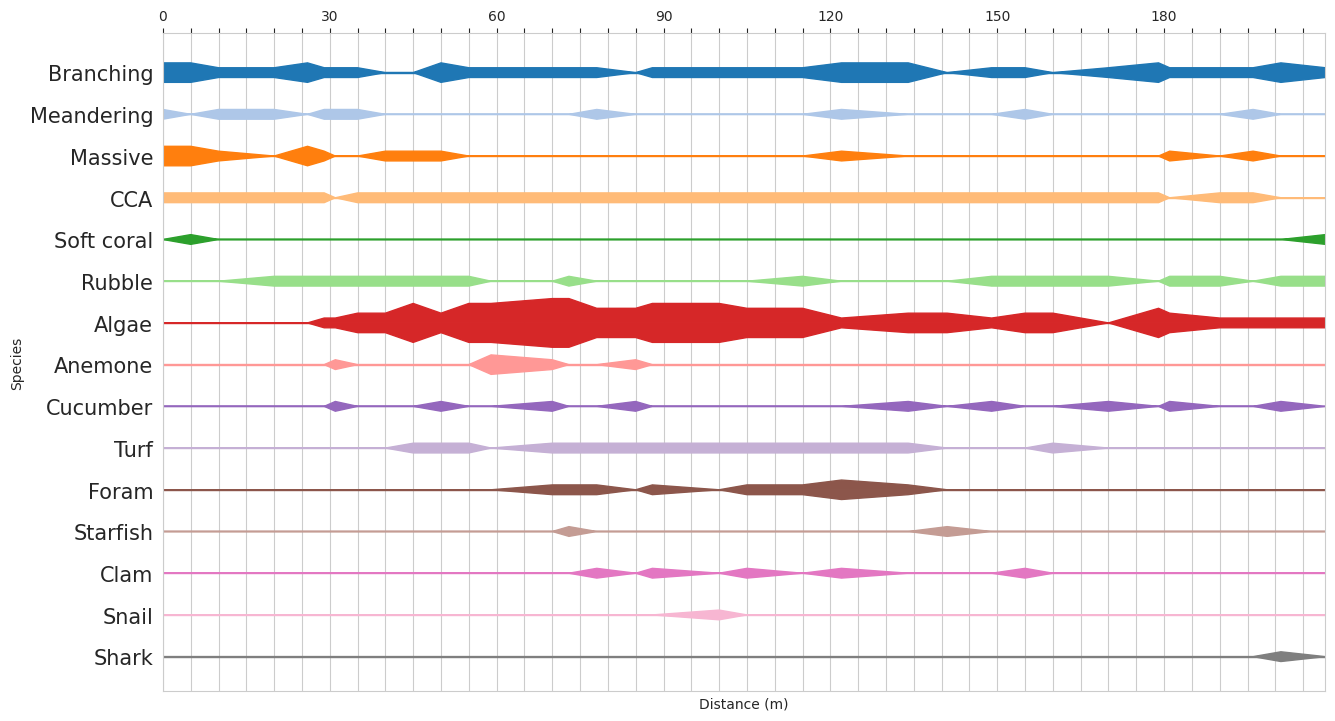

In [45]:
def kite_diagram(df, axis_labs):
    """Function to draw a kite diagram."""   
    plt.figure(figsize=(15,15))
    # plt.axes()
    start_points = []
    v1 = np.array(df.iloc[:, [0]])
    y_values = df.columns
    y_values = np.delete(y_values, 0)
    num_cols = len(df.columns) - 1
    
    df_cols = df.iloc[:, 1:len(df.columns)]
    max_val = max(df_cols.max()) * 1.5
        
    for j in range(1, num_cols + 1):
        p1 = []
        p2 = []      
        p3 = []  
        v2 = np.array(df.iloc[:, [j]]) / 2       
        if j == 1:
            start_point = max_val / 2 + max_val*num_cols
        else:
            start_point = start_point - max_val        
        start_points.append(start_point)
        p1.append([0, start_point])
        p2.append([0, start_point])
        p3.append([0, start_point])
        
        scaling_int = 1.75
        for i in range(0, len(v1)):
            p1.append([v1[i][0], (start_point + scaling_int*v2[i])[0]]) 
            p2.append([v1[i][0], (start_point - scaling_int*v2[i])[0]])  
            p3.append([v1[i][0], start_point])
        p1.append([v1[i][0], start_point])
        p2.append([v1[i][0], start_point])
        p3.append([v1[i][0], start_point])      
        c = contrasting_colour_array[j-1]
        
        l1 = plt.Polygon(p1, closed=True, fill=True, edgecolor=None, color=c)
        l2 = plt.Polygon(p2, closed=None, fill=True, edgecolor=None, color=c)
        l3 = plt.Polygon(p3, closed=None, fill=True, edgecolor=None, color=c)
        plt.gca().add_line(l1)
        plt.gca().add_line(l2)
        plt.gca().add_line(l3)


    # x ticks on top
    plt.tick_params(axis='x', which='both', top=True, bottom=False)
    plt.gca().xaxis.set_ticks_position('top')
    
    # disable y ticks
    plt.yticks([])
    plt.yticks(start_points, y_values, fontsize=15)

    # disable gridlines on y axis
    plt.gca().yaxis.grid(False)

    plt.gca().margins(x=0, y=0.05)

    # x ticks every 5 metres and label every fifth tick
    plt.xticks(range(0, 215, 5), [str(x) if x % 30 == 0 else '' for x in range(0, 215, 5)])

    plt.xlabel(axis_labs[0])
    plt.ylabel(axis_labs[1])

    # for i in range(1, len(df.columns)):
    #     txt = plt.text(210, start_points[i-1], df.columns[i], ha='right', va='center', zorder=10, fontsize=13)
    #     txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])

    plt.axis('scaled')
    # plt.title('Kite Plot of Coral Type by Distance', fontsize=20)
    plt.savefig('output/map/kite_diagram.png', dpi=500, bbox_inches='tight')
    plt.show()

kite_diagram(distance__and_quantity_df, ['Distance (m)', 'Species'])